In [1]:
import numpy as np
from pandas_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score  
from sklearn import metrics
from sklearn.metrics import confusion_matrix
matplotlib.rcParams['figure.figsize'] = (10,5)

In [2]:
missing_values = ['N/A','--','n/a','NaN','na']
data=pd.read_excel(r"C:\Users\Nirav\OneDrive\Desktop\alz paper related\Dataset\OASIS3.xlsx",na_values=missing_values)
print("total no.of rows and columns:",data.shape)
print("total size:",data.size)

total no.of rows and columns: (1098, 18)
total size: 19764


In [3]:
profile = ProfileReport(data, title="Pandas Profiling Report",explorative=True)

In [4]:
profile.to_widgets()

In [5]:
data.columns=data.columns.str.capitalize()  

In [6]:
data.rename(columns = {'M/f':'Gender'}, inplace = True)
data.rename(columns = {'Dx1':'Group'}, inplace = True)

In [7]:
data = data.drop(['Subject'], axis=1)

In [8]:
data=data.fillna(data.mean())

In [9]:
data["Gender"] = data["Gender"].astype("|S")
data["Hand"] = data["Hand"].astype("|S")
data["Group"] = data["Group"].astype("|S")

In [10]:
data['Group'].unique()

array([b'Cognitively normal', b'Uncertain Dementia', b'AD Dementia',
       b'Frontotemporal Dementia', b'Lewy bodies dementia',
       b'Vascular Dementia', b'Parkinsons Dementia'], dtype='|S23')

In [11]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
data['Gender']= label_encoder.fit_transform(data['Gender']) 
data['Gender'].unique()

array([0, 1], dtype=int64)

In [12]:
data['Group']= label_encoder.fit_transform(data['Group']) 
data['Group'].unique()

array([1, 5, 0, 2, 3, 6, 4], dtype=int64)

In [13]:
data['Hand']= label_encoder.fit_transform(data['Hand']) 
data['Hand'].unique() 

array([2, 1, 0], dtype=int64)

In [14]:
data['Group'].value_counts()

1    751
0    241
5     76
3     14
2      7
6      5
4      4
Name: Group, dtype: int64

In [15]:
data_majority = data[data.Group==1]
data_minority = data[data.Group==0]

from sklearn.utils import resample
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=700,    # to match majority class
                                 random_state=4) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
#data_upsampled.balance.value_counts()
data_upsampled['Group'].value_counts()

1    751
0    700
Name: Group, dtype: int64

In [16]:
data_majority = data[data.Group==1]
data_minority1 = data[data.Group==2]

from sklearn.utils import resample
data_minority_upsampled1 = resample(data_minority1, 
                                 replace=True,     # sample with replacement
                                 n_samples=700,    # to match majority class
                                 random_state=4) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_upsampled, data_minority_upsampled1])
 
# Display new class counts
#data_upsampled.balance.value_counts()
data_upsampled['Group'].value_counts()

1    751
2    700
0    700
Name: Group, dtype: int64

In [17]:
data_majority = data[data.Group==1]
data_minority2 = data[data.Group==3]

from sklearn.utils import resample
data_minority_upsampled1 = resample(data_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=700,    # to match majority class
                                 random_state=4) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_upsampled, data_minority_upsampled1])
 
# Display new class counts
#data_upsampled.balance.value_counts()
data_upsampled['Group'].value_counts()

1    751
3    700
2    700
0    700
Name: Group, dtype: int64

In [18]:
data_majority = data[data.Group==1]
data_minority2 = data[data.Group==4]

from sklearn.utils import resample
data_minority_upsampled1 = resample(data_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=700,    # to match majority class
                                 random_state=4) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_upsampled, data_minority_upsampled1])
 
# Display new class counts
#data_upsampled.balance.value_counts()
data_upsampled['Group'].value_counts()

1    751
3    700
4    700
2    700
0    700
Name: Group, dtype: int64

In [19]:
data_majority = data[data.Group==1]
data_minority2 = data[data.Group==5]

from sklearn.utils import resample
data_minority_upsampled1 = resample(data_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=700,    # to match majority class
                                 random_state=4) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_upsampled, data_minority_upsampled1])
 
# Display new class counts
#data_upsampled.balance.value_counts()
data_upsampled['Group'].value_counts()

1    751
3    700
2    700
5    700
4    700
0    700
Name: Group, dtype: int64

In [20]:
data_majority = data[data.Group==1]
data_minority2 = data[data.Group==6]

from sklearn.utils import resample
data_minority_upsampled1 = resample(data_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=700,    # to match majority class
                                 random_state=4) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_upsampled, data_minority_upsampled1])
 
# Display new class counts
#data_upsampled.balance.value_counts()
data_upsampled['Group'].value_counts()

1    751
3    700
6    700
2    700
5    700
4    700
0    700
Name: Group, dtype: int64

In [21]:
data_upsampled.shape

(4951, 17)

In [22]:
data1=data_upsampled.copy()

In [23]:
data.shape

(1098, 17)

<AxesSubplot:>

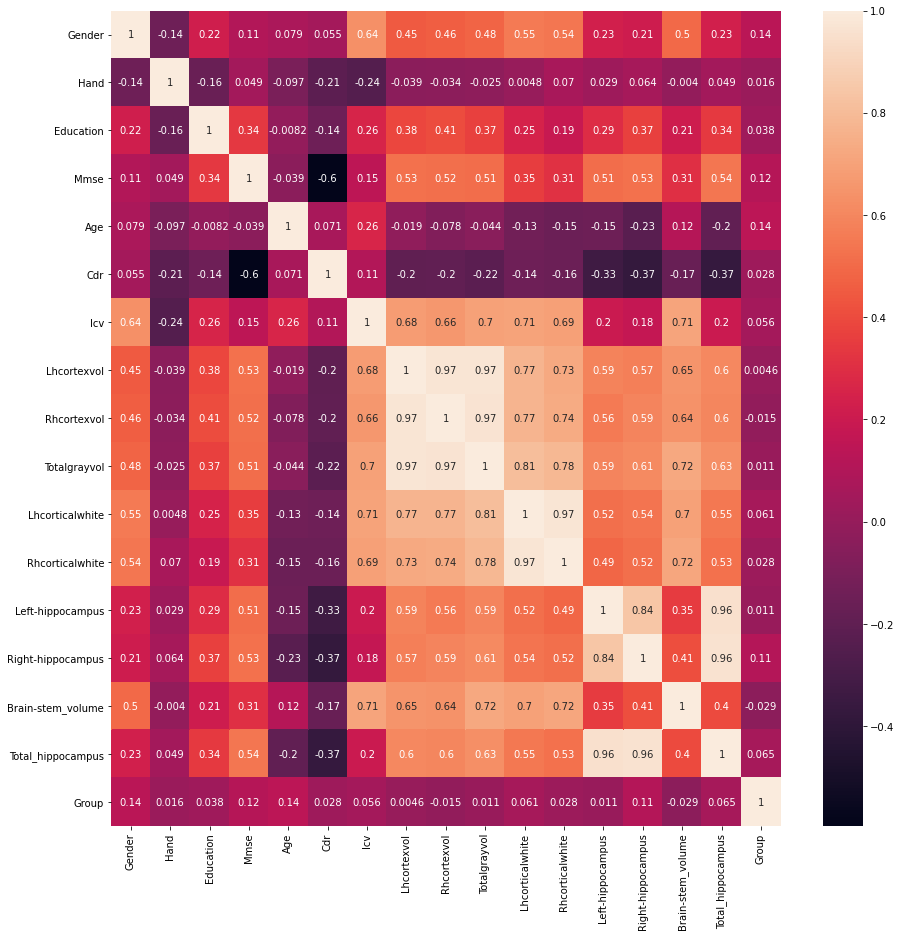

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(data1.corr(), annot = True)

# RANDOM FOREST

In [25]:
X=data1.iloc[:,:-1]
y = pd.DataFrame(data1.iloc[:,-1])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# Dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [29]:
clf = RandomForestClassifier(n_estimators = 20,max_depth=None, min_samples_split=2, min_samples_leaf=1,max_features='auto',criterion='gini') 
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [31]:
y_pred = clf.predict(X_test)

In [32]:
RF1=accuracy_score(y_test, y_pred)
print('accuracy:',RF1)

accuracy: 0.9818304172274562


In [33]:
print( np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

0.9864328430311007


In [34]:
RF1=accuracy_score(y_test, y_pred)
print('accuracy:',RF1)
cm = metrics.confusion_matrix(y_test,y_pred)
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_Score = 2*(precision*recall)/(precision+recall)
print("False positive",FP)
print("True positive",TP)
print("False negative",FN)
print("True negative",TN)
print("Precision",precision)
print("Recall", recall)
print("F1_score",F1_Score)

accuracy: 0.9818304172274562
False positive [14.  8.  0.  1.  0.  4.  0.]
True positive [204. 215. 215. 199. 213. 208. 205.]
False negative [ 9. 18.  0.  0.  0.  0.  0.]
True negative [1259. 1245. 1271. 1286. 1273. 1274. 1281.]
Precision [0.93577982 0.96412556 1.         0.995      1.         0.98113208
 1.        ]
Recall [0.95774648 0.92274678 1.         1.         1.         1.
 1.        ]
F1_score [0.94663573 0.94298246 1.         0.99749373 1.         0.99047619
 1.        ]


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       213
           1       0.96      0.92      0.94       233
           2       1.00      1.00      1.00       215
           3       0.99      1.00      1.00       199
           4       1.00      1.00      1.00       213
           5       0.98      1.00      0.99       208
           6       1.00      1.00      1.00       205

    accuracy                           0.98      1486
   macro avg       0.98      0.98      0.98      1486
weighted avg       0.98      0.98      0.98      1486



# FEATURE SELECTION

In [36]:
from boruta import BorutaPy

In [37]:
from sklearn.model_selection import train_test_split
X_train11, X_test11, y_train11, y_test11 = train_test_split(X, y, test_size = 0.3)

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train11 = sc.fit_transform(X_train11)
X_test11 = sc.transform(X_test11)

In [39]:
boruta_selector = BorutaPy(clf, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train11), np.array(y_train11))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	0
Rejected: 	0


BorutaPy(estimator=RandomForestClassifier(n_estimators=56,
                                          random_state=RandomState(MT19937) at 0x1823CDA0440),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1823CDA0440, verbose=2)

In [40]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

Ranking:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
No. of significant features:  16


In [41]:
selected_rf_features = pd.DataFrame({'Feature':list(X.columns),
                                       'Ranking':boruta_selector.ranking_})

In [42]:
selected_rf_features.sort_values(by='Ranking') 

,Feature,Ranking
0,Gender,1
1,Hand,1
2,Education,1
3,Mmse,1
4,Age,1
5,Cdr,1
6,Icv,1
7,Lhcortexvol,1
8,Rhcortexvol,1
9,Totalgrayvol,1


In [43]:
X_important_train = boruta_selector.transform(np.array(X_train11))
X_important_test = boruta_selector.transform(np.array(X_test11))

In [44]:
clf1=RandomForestClassifier(n_estimators = 20) 
clf1.fit(X_important_train, y_train11) 

RandomForestClassifier(n_estimators=20)

In [45]:
accuracy_score(y_test11, clf1.predict(X_important_test))

0.9979811574697174

In [46]:
print(classification_report(y_test11, clf1.predict(X_important_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       197
           1       1.00      1.00      1.00       225
           2       1.00      1.00      1.00       202
           3       1.00      1.00      1.00       213
           4       1.00      1.00      1.00       210
           5       0.99      1.00      1.00       205
           6       1.00      1.00      1.00       234

    accuracy                           1.00      1486
   macro avg       1.00      1.00      1.00      1486
weighted avg       1.00      1.00      1.00      1486



In [47]:
RB1=accuracy_score(y_test11, clf1.predict(X_important_test))
print('accuracy:',RB1)
cm = metrics.confusion_matrix(y_test11,clf1.predict(X_important_test))
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_Score = 2*(precision*recall)/(precision+recall)
print("False positive",FP)
print("True positive",TP)
print("False negative",FN)
print("True negative",TN)
print("Precision",precision)
print("Recall", recall)
print("F1_score",F1_Score)

accuracy: 0.9979811574697174
False positive [1. 0. 0. 0. 0. 2. 0.]
True positive [195. 224. 202. 213. 210. 205. 234.]
False negative [2. 1. 0. 0. 0. 0. 0.]
True negative [1288. 1261. 1284. 1273. 1276. 1279. 1252.]
Precision [0.99489796 1.         1.         1.         1.         0.99033816
 1.        ]
Recall [0.98984772 0.99555556 1.         1.         1.         1.
 1.        ]
F1_score [0.99236641 0.99777283 1.         1.         1.         0.99514563
 1.        ]


In [48]:
print( np.mean(cross_val_score(clf1, X_important_train, y_train11,cv=10)))

0.9945178324532323


# SUPPORT VECTOR MACHINE

In [49]:
X1=data1.iloc[:,:-1]
y1 = pd.DataFrame(data1.iloc[:,-1])

In [50]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3)

In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [52]:
# Dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train1 = pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train1,y_train1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.889, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.903, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.874, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.873, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.856, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.714, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.710, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.723, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.755, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.0min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [54]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1)


In [60]:
from sklearn import svm

#Create a svm Classifier
svm1 = svm.SVC(kernel='rbf',C= 100, gamma = 1)

#Train the model using the training sets
svm1.fit(X_train1, y_train1)

#Predict the response for test dataset
y_pred1 = svm1.predict(X_test1)

In [61]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test1, y_pred1))

Accuracy: 0.9771197846567967


In [62]:
SVC1=accuracy_score(y_test1, y_pred1) 
print('accuracy:',SVC1)
cm1 = metrics.confusion_matrix(y_test1,y_pred1)
FP1 = cm1.sum(axis=0) - np.diag(cm1) 
FN1 = cm1.sum(axis=1) - np.diag(cm1)
TP1 = np.diag(cm1)
TN1 = cm1.sum() - (FP1 + FN1 + TP1)
FP1 = FP1.astype(float)
FN1 = FN1.astype(float)
TP1 = TP1.astype(float)
TN1 = TN1.astype(float)
precision1 = TP1/(TP1+FP1)
recall1 = TP1/(TP1+FN1)
F1_Score1 = 2*(precision1*recall1)/(precision1+recall1)
print("False positive",FP1)
print("True positive",TP1)
print("False negative",FN1)
print("True negative",TN1)
print("Precision",precision1)
print("Recall", recall1)
print("F1_score",F1_Score1)

accuracy: 0.9771197846567967
False positive [10. 13.  0.  0.  0. 11.  0.]
True positive [212. 195. 192. 211. 224. 208. 210.]
False negative [15. 19.  0.  0.  0.  0.  0.]
True negative [1249. 1259. 1294. 1275. 1262. 1267. 1276.]
Precision [0.95495495 0.9375     1.         1.         1.         0.94977169
 1.        ]
Recall [0.9339207  0.91121495 1.         1.         1.         1.
 1.        ]
F1_score [0.94432071 0.92417062 1.         1.         1.         0.97423888
 1.        ]


In [63]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       227
           1       0.94      0.91      0.92       214
           2       1.00      1.00      1.00       192
           3       1.00      1.00      1.00       211
           4       1.00      1.00      1.00       224
           5       0.95      1.00      0.97       208
           6       1.00      1.00      1.00       210

    accuracy                           0.98      1486
   macro avg       0.98      0.98      0.98      1486
weighted avg       0.98      0.98      0.98      1486



In [64]:
print( np.mean(cross_val_score(svm1, X_train1, y_train1, cv=10)))

0.9772009461778082
